<a href="https://colab.research.google.com/github/yoonjaeuk/2023S-Ajou-ML/blob/main/HW2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd # 경로 조정 # 경로는 본인의 환경에 맞게 조절 가능

[Errno 2] No such file or directory: '# 경로 조정 # 경로는 본인의 환경에 맞게 조절 가능'
/content


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [4]:
df = pd.read_csv('./train(1).csv') # 제공된 train.csv 사용 # 환경에 맞게 path 조절 가능
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [7]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## 간단한 EDA

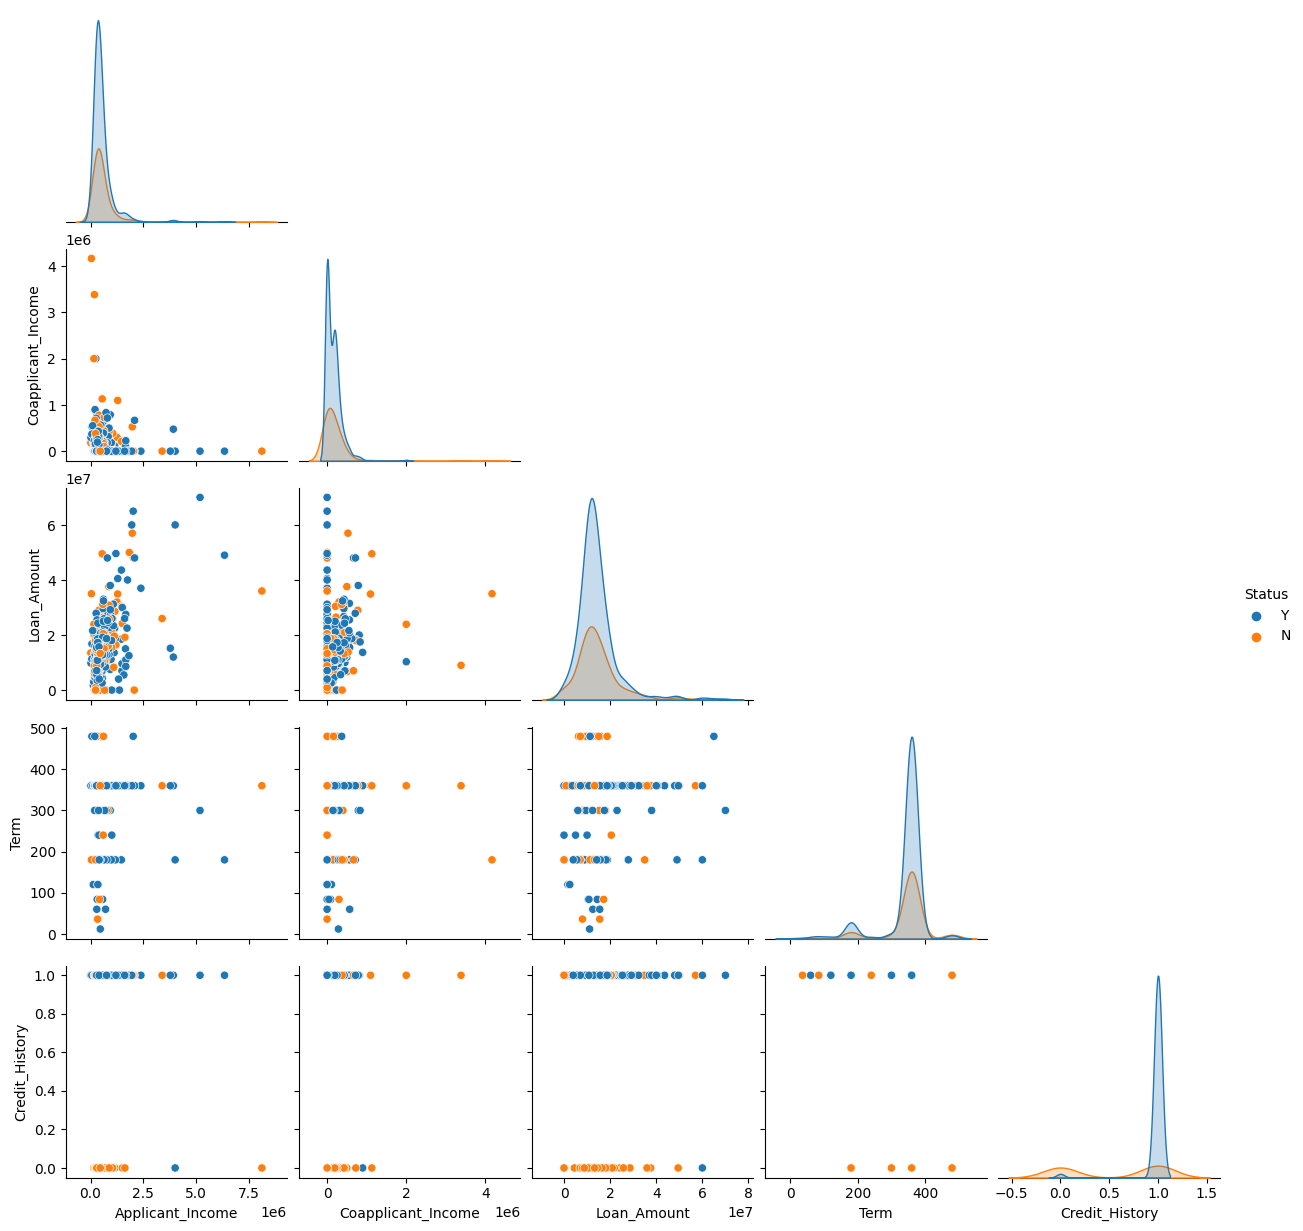

In [9]:
sns.pairplot(df,corner=True,hue='Status') # 이 데이터의 타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

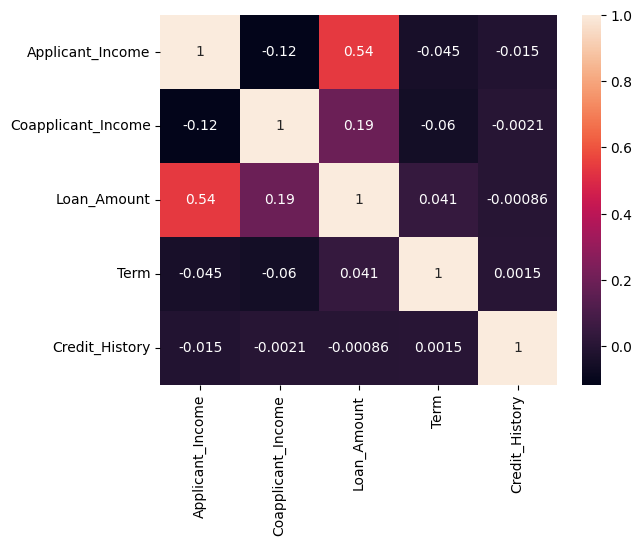

In [10]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [11]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  


*   'Credit_History'열에 있는 결측값도 함께 제거합니다.

참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.




In [12]:
## 문제 1 ##
# 코드 작성

##########
df['Gender'].dropna(axis = 0)
df['Married'].dropna(axis = 0)
df['Education'].dropna(axis = 0)
df['Self_Employed'].dropna(axis = 0)
df['Area'].dropna(axis = 0)
df['Status'].dropna(axis = 0)
df['Credit_History'].dropna(axis = 0)
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [13]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook

In [14]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음

In [15]:
## 문제 2 ##
# 코드 작성
for col in tqdm_notebook(categorical):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
##########

<ipython-input-15-035c95b9b522>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for col in tqdm_notebook(categorical):


  0%|          | 0/7 [00:00<?, ?it/s]

In [16]:
df # categorical -> numerical 로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


In [17]:
df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.


* categorical feature와 imputer를 적용하려고 하는 feature(term)를 제외하고, 나머지 numerical feature에 대해서 normalization을 수행한 다음 imputation을 진행해주세요. (imputation을 할 때에만 normalized된 feature들을 사용합니다)
* **주의)** 'Credit_History'는 categorical feature로 간주하여야 합니다.
* term의 결측치를 채울 때에는 'normalized_df'를 사용하고 원본 데이터프레임의 'term' 열만 knn imputer로 결측치를 채운 'term'열로 변경합니다.
* 문제3번 이후 문제에서는 term의 결측치를 채운 변경된 df를 이용합니다.



### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.
* 참고) 거리를 구할 때 데이터에 null 값이 있으면 거리가 nan으로 계산이 됩니다. 따라서 null인 데이터가 있는 행을 제외하고 거리를 계산하거나 모든 거리를 계산하고 nan 을 가진 데이터는 k개를 고를 때 제외해주시면 됩니다.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd
#Numerical feature에 대해서 Normalization
st_scaler = StandardScaler()
st_scaler.fit(df[['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']])
df_sp_1_sc = st_scaler.transform(df[['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']])

In [19]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


In [20]:
df_tt_sc= pd.DataFrame(df_sp_1_sc, columns = df[['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']].columns)

In [77]:
df_tt_sc

,Applicant_Income,Coapplicant_Income,Loan_Amount
0,0.072991,-0.554487,0.097515
1,-0.134412,-0.038732,-0.152244
2,-0.393747,-0.554487,-0.856110
3,-0.462062,0.251980,-0.243065
4,0.097728,-0.554487,-0.004659
...,...,...,...
609,-0.410130,-0.554487,-0.799346
610,-0.212557,-0.554487,-1.151279
611,0.437174,-0.472404,1.266840
612,0.357064,-0.554487,0.517563


In [21]:
df = df.drop(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount'], axis = 1)

In [22]:
df= pd.concat([df, df_tt_sc], axis = 1)
df

,Gender,Married,Dependents,Education,Self_Employed,Term,Credit_History,Area,Status,Applicant_Income,Coapplicant_Income,Loan_Amount
0,1,0,0,0,0,360.0,1.0,2,1,0.072991,-0.554487,0.097515
1,1,1,1,0,0,360.0,1.0,0,0,-0.134412,-0.038732,-0.152244
2,1,1,0,0,1,360.0,1.0,2,1,-0.393747,-0.554487,-0.856110
3,1,1,0,1,0,360.0,1.0,2,1,-0.462062,0.251980,-0.243065
4,1,0,0,0,0,360.0,1.0,2,1,0.097728,-0.554487,-0.004659
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,360.0,1.0,0,1,-0.410130,-0.554487,-0.799346
610,1,1,3,0,0,180.0,1.0,0,1,-0.212557,-0.554487,-1.151279
611,1,1,1,0,0,360.0,1.0,2,1,0.437174,-0.472404,1.266840
612,1,1,2,0,0,360.0,1.0,2,1,0.357064,-0.554487,0.517563


In [23]:
import tqdm
import math

In [24]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 3)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns = df.columns)

In [82]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Term                  0
Credit_History        0
Area                  0
Status                0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
dtype: int64

#3번 과제 정확히 이해를 못해서.. 그냥 간단히 결측값 채웠다는 것 알려드립니다!

In [83]:
#3번 과제 정확히 이해를 못해서.. 그냥 간단히 결측값 채웠다는 것 알려드립니다!
class Knn_imputer():
  def __init__(self, n_neighbors): 
        
    ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
    self.k = n_neighbors    
  
  ## knn 은 lazy learning 입니다.
  def fit(self,X):
      self.X = X
  
  def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    mean_value = 0.0
    for i in tqdm.tqdm(range(len(X))):
     if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인

        distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
      
        
        sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기
       
        
        
         ################  문제 3-2  ####################
         # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
         # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
         # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
        

        mean_value = np.mean(sorted_dist.iloc[i])
        print(mean_value)
        

        ################ 코드 끝  ######################
        ##############################################
      
  
  def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
    num_train = X.shape[0]
    distance = 0
    X = X.drop([feat_name], axis=1)
    y = y.drop([feat_name])
    
    dist_dict = {} ## {index : distance} 형태

    for i in range(num_train):
      
    
    ################  문제 3-1  ####################
    # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
    # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
    # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
    ################ 코드 시작  #####################
    
       distance += (X[i] - y[i])**2
       distance = math.sqrt(distance)
       dist_dict[i] = distance 
     
    ################ 코드 끝  ######################
    ##############################################
    return dist_dict


In [ ]:
# 아래 숫자는 변경하셔도 상관 없습니다.
imputer = Knn_imputer(3)
imputer.fit(df)

# test set에 대해 predict를 진행합니다.
imputer.predict(df, 'Term')

In [25]:
df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Term                  0
Credit_History        0
Area                  0
Status                0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
dtype: int64

## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술
: Credit_History가 0.55로 가장 영향을 많이 끼친다

<Axes: >

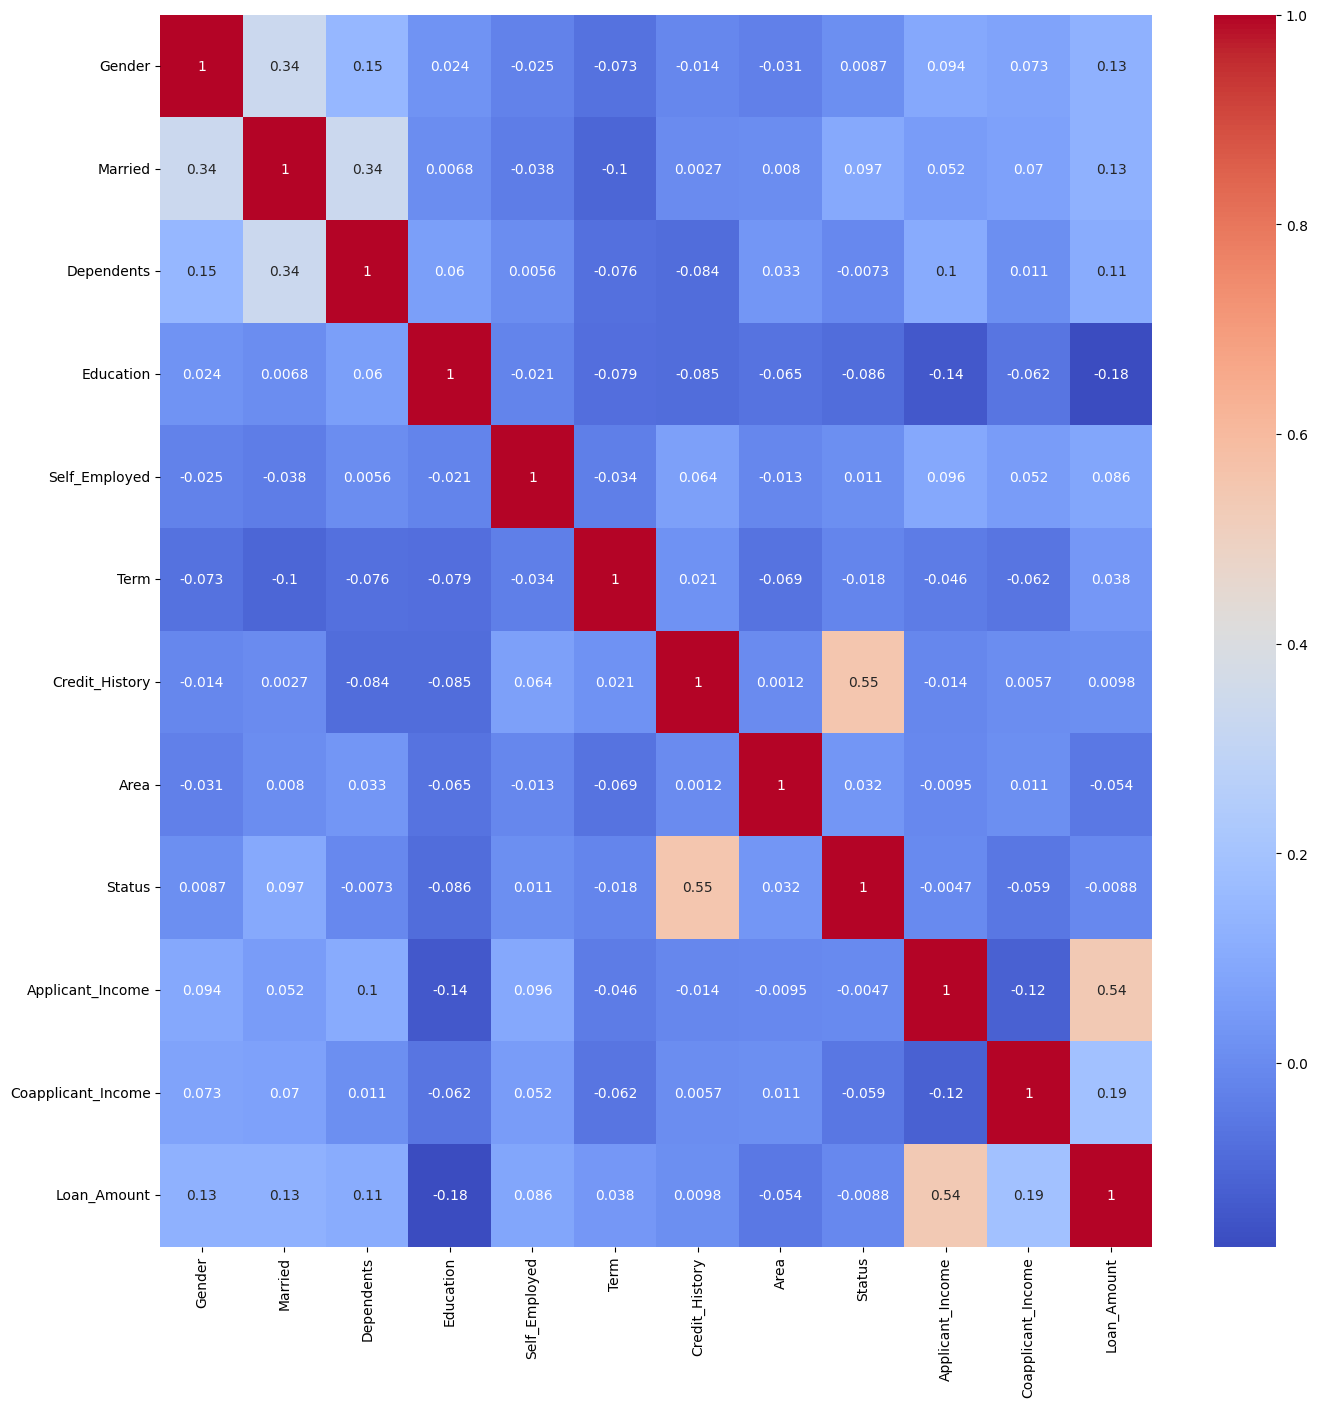

In [26]:
plt.figure(figsize = (16,16)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
############

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (490, 11)
y_train's shape :  (490,)

X_val's shape :  (62, 11)
y_val's shape :  (62,)

X_test's shape :  (62, 11)
y_test's shape :  (62,)


## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

In [29]:
X.dropna(axis=1)

,Gender,Married,Dependents,Education,Self_Employed,Term,Credit_History,Area,Applicant_Income,Coapplicant_Income,Loan_Amount
0,1.0,0.0,0.0,0.0,0.0,360.0,1.0,2.0,0.072991,-0.554487,0.097515
1,1.0,1.0,1.0,0.0,0.0,360.0,1.0,0.0,-0.134412,-0.038732,-0.152244
2,1.0,1.0,0.0,0.0,1.0,360.0,1.0,2.0,-0.393747,-0.554487,-0.856110
3,1.0,1.0,0.0,1.0,0.0,360.0,1.0,2.0,-0.462062,0.251980,-0.243065
4,1.0,0.0,0.0,0.0,0.0,360.0,1.0,2.0,0.097728,-0.554487,-0.004659
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,360.0,1.0,0.0,-0.410130,-0.554487,-0.799346
610,1.0,1.0,3.0,0.0,0.0,180.0,1.0,0.0,-0.212557,-0.554487,-1.151279
611,1.0,1.0,1.0,0.0,0.0,360.0,1.0,2.0,0.437174,-0.472404,1.266840
612,1.0,1.0,2.0,0.0,0.0,360.0,1.0,2.0,0.357064,-0.554487,0.517563


In [30]:
X.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Term                  0
Credit_History        0
Area                  0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
dtype: int64

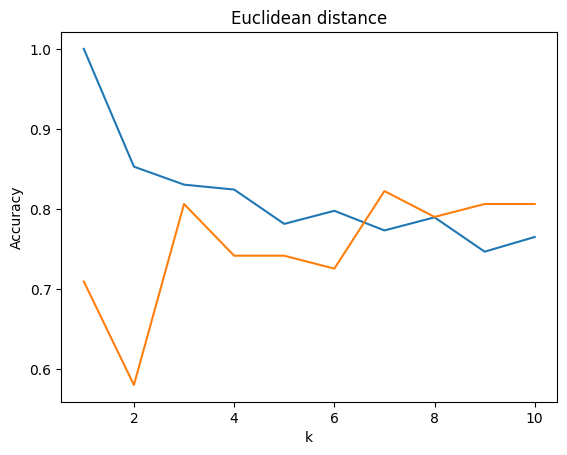

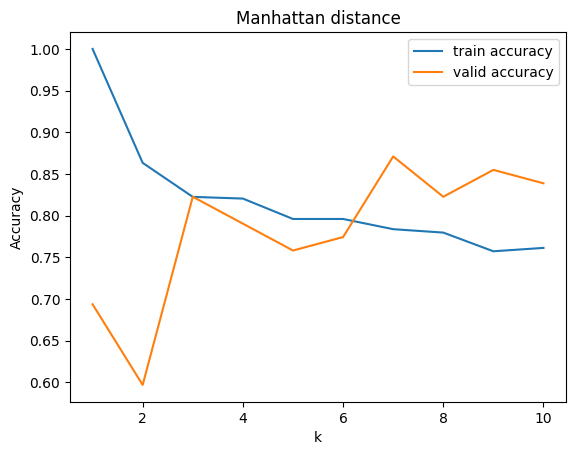

0.8064516129032258

In [31]:
### 문제 1 ###
### 코드 작성 ###
k_list = range(1,10)

#accuracy를 담을 리스트 선언
train_acc = []
valid_acc = []
train_acc2 = []
valid_acc2 = []

for k in k_list: 
    knn = KNeighborsClassifier(n_neighbors=k, p=2) 
    knn.fit(X_train, y_train) 
    valid_acc.append(knn.score(X_val, y_val)) #valid 정확도 계산
    train_acc.append(knn.score(X_train,y_train)) #train 정확도 계산

plt.plot(k_list,train_acc,label='train accuracy')
plt.plot(k_list,valid_acc,label='valid accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Euclidean distance")  #유클리드 거리
plt.show()

for k in k_list: 
    knn2 = KNeighborsClassifier(n_neighbors=k, p=1) 
    knn2.fit(X_train, y_train) 
    valid_acc2.append(knn2.score(X_val, y_val)) #valid 정확도 계산
    train_acc2.append(knn2.score(X_train,y_train)) #train 정확도 계산
    
plt.plot(k_list,train_acc2,label='train accuracy')
plt.plot(k_list,valid_acc2,label='valid accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Manhattan distance")  #맨하튼 거리
plt.legend()
plt.show()


classifier=KNeighborsClassifier(n_neighbors=3)  #최적 파라미터는 k= 3 이라 생각 -> test accuracy 계산
classifier.fit(X_train,y_train)
result=classifier.predict(X_test)
accuracy_score(y_test,result)
################

**설명 작성**  
- 최적의 파라미터:K = 3
- 설명: train accuracy와 valid accuracy 전체적으로 보았을때 k = 3일 경우 accuracy가 80% 정도로 높은 값을 보여주고 있다

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

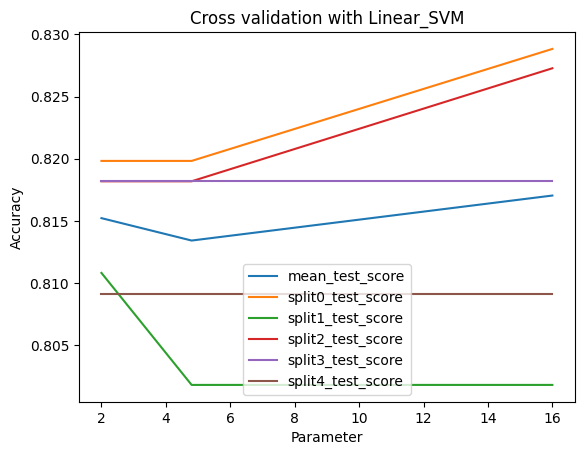

0.7580645161290323


In [37]:
## 문제 6-1 ##
# 코드 작성

model = SVC(kernel = 'linear', C = 1.0)  #linear_svm 모델

cross_val_df, test_df = train_test_split(df, test_size = 0.1, random_state= 1)

parameter_grid = {'C' :[2,4.8,16]}  #hyperparameter

para = list(parameter_grid.values())
para=sum(para,[])

#5-fold cross validation
grid_search = GridSearchCV(estimator=model,cv=5,param_grid=parameter_grid)

#모델 트레이닝
grid_search.fit(cross_val_df.drop('Status',axis=1),cross_val_df['Status'])

#교차 검증 결과
result_df=pd.DataFrame(grid_search.cv_results_)

mean=list(result_df['mean_test_score'])
split0=list(result_df['split0_test_score'])
split1=list(result_df['split1_test_score'])
split2=list(result_df['split2_test_score'])
split3=list(result_df['split3_test_score'])
split4=list(result_df['split4_test_score'])

#그래프그리기
plt.plot(para,mean,label='mean_test_score')
plt.plot(para,split0,label='split0_test_score')
plt.plot(para,split1,label='split1_test_score')
plt.plot(para,split2,label='split2_test_score')
plt.plot(para,split3,label='split3_test_score')
plt.plot(para,split4,label='split4_test_score')
plt.xlabel("Parameter")
plt.ylabel("Accuracy")
plt.title("Cross validation with Linear_SVM")
plt.legend()
plt.show()
############

print(accuracy_score(test_df['Status'],grid_search.predict(test_df.drop('Status',axis=1))))

**설명 작성**  
- 최적의 파라미터:
- 설명:

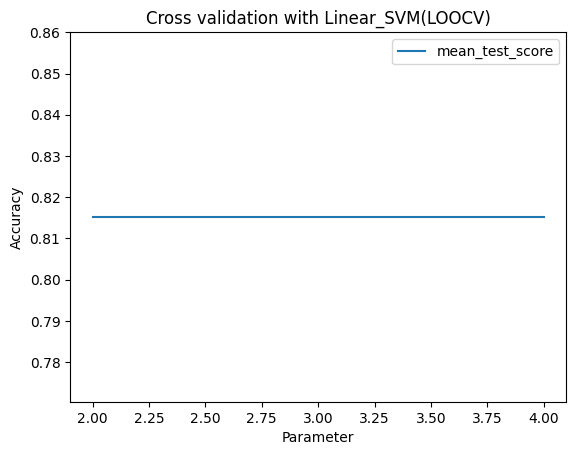

0.7580645161290323


In [40]:
## 문제 6-2 ##
# 코드 작성

model = SVC(kernel = 'linear', C = 1.0) #linear_svm 모델

cross_val_df,test_df=train_test_split(df,test_size=0.1,random_state=1)



#hyperparameter
parameter_grid={
    
    
    'C':[2,4]

}


para = list(parameter_grid.values())
para=sum(para,[])

#LOOCV 교차검증
loo=LeaveOneOut()

#5-fold cross validation
grid_search = GridSearchCV(estimator= model,cv=loo,param_grid=parameter_grid)

#모델 트레이닝
grid_search.fit(cross_val_df.drop('Status',axis=1),cross_val_df['Status'])

#교차 검증 결과
result_df=pd.DataFrame(grid_search.cv_results_)

mean=list(result_df['mean_test_score'])

#그래프그리기
plt.plot(para,mean,label='mean_test_score')
plt.xlabel("Parameter")
plt.ylabel("Accuracy")
plt.title("Cross validation with Linear_SVM(LOOCV)")
plt.legend()
plt.show()

#최종 결과값
print(accuracy_score(test_df['Status'],grid_search.predict(test_df.drop('Status',axis=1))))


**설명 작성**  
- 최적의 파라미터:
- 설명:

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


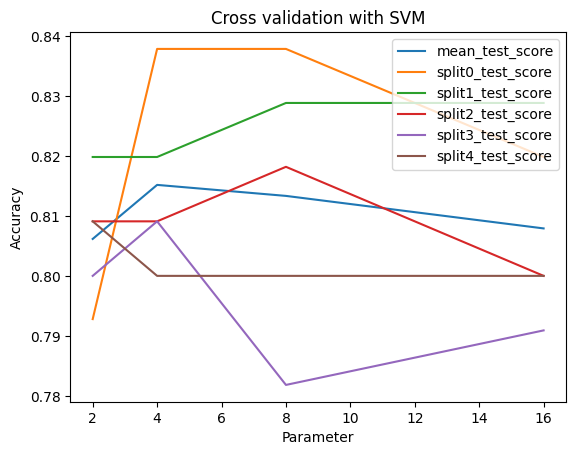

0.7096774193548387


In [38]:
## 문제 7-1 ##
# 코드 작성

model = SVC(kernel = 'rbf', C = 2.0, gamma = 0.1)

cross_val_df, test_df = train_test_split(df, test_size = 0.1, random_state= 1)

parameter_grid = {'C' :[2,4,8,16]}

para = list(parameter_grid.values())
para=sum(para,[])

#Cross-Validated Grid Search(5-fold cross validation)
grid_search = GridSearchCV(estimator=model,cv=5,param_grid=parameter_grid)

#Training the models
grid_search.fit(cross_val_df.drop('Status',axis=1),cross_val_df['Status'])

#Cross-Validated Results(교차 검증 결과)
result_df=pd.DataFrame(grid_search.cv_results_)

mean=list(result_df['mean_test_score'])
split0=list(result_df['split0_test_score'])
split1=list(result_df['split1_test_score'])
split2=list(result_df['split2_test_score'])
split3=list(result_df['split3_test_score'])
split4=list(result_df['split4_test_score'])

#그래프그리기
plt.plot(para,mean,label='mean_test_score')
plt.plot(para,split0,label='split0_test_score')
plt.plot(para,split1,label='split1_test_score')
plt.plot(para,split2,label='split2_test_score')
plt.plot(para,split3,label='split3_test_score')
plt.plot(para,split4,label='split4_test_score')
plt.xlabel("Parameter")
plt.ylabel("Accuracy")
plt.title("Cross validation with SVM")
plt.legend()
plt.show()
############

print(accuracy_score(test_df['Status'],grid_search.predict(test_df.drop('Status',axis=1))))
############

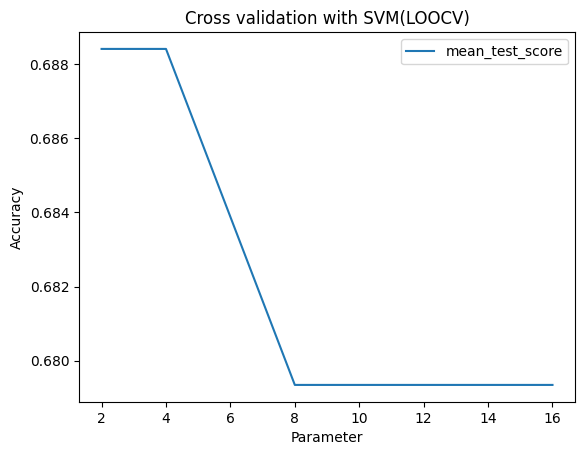

0.6774193548387096


In [39]:
## 문제 7-2 ##
# 코드 작성
model = SVC(kernel = 'rbf', C = 2.0)

cross_val_df,test_df=train_test_split(df,test_size=0.1,random_state=1)


parameter_grid = {'C' :[2,4,8,16]}

#hyperparameter 후보들 리스트화
para = list(parameter_grid.values())
para=sum(para,[])

#LOOCV 교차검증
loo=LeaveOneOut()

#Cross-Validated Grid Search(5-fold cross validation)
grid_search = GridSearchCV(estimator= model,cv=loo,param_grid=parameter_grid)

#Training the models
grid_search.fit(cross_val_df.drop('Status',axis=1),cross_val_df['Status'])

#Cross-Validated Results(교차 검증 결과)
result_df=pd.DataFrame(grid_search.cv_results_)

#평균 정확도 리스트화
mean=list(result_df['mean_test_score'])

#그래프그리기
plt.plot(para,mean,label='mean_test_score')
plt.xlabel("Parameter")
plt.ylabel("Accuracy")
plt.title("Cross validation with SVM(LOOCV)")
plt.legend()
plt.show()

#Final Evaluation(최종)
print(accuracy_score(test_df['Status'],grid_search.predict(test_df.drop('Status',axis=1))))
############

**7-3 설명 작성**  
- 설명:선형 관계일때 정확도는 75% 가량이 나왔는데 비선형일때는 약 70% 정도가 나왔다 따라서 선형 관계일때 정확도가 더 높기 때문에 선형 관계라고 생각한다

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [112]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [113]:
## 문제 8-1 ##
## 코드 작성 ##
rf_model = RandomForestClassifier()

# param_그리드 설정
param_grid = {
   'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# GridSearchCV
rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5
)

# GridSearchCV 수행
rf_grid.fit(X_train, y_train)

# best hyperparameter 출력
print("Best hyperparameters: ", rf_grid.best_params_)
############

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}


### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [114]:
from sklearn.metrics import accuracy_score

In [116]:
## 문제 8-2 ##
## 코드 작성 ##
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# best hyperparameter로 모델 생성
rf_model = RandomForestClassifier(
    n_estimators=rf_grid.best_params_['n_estimators'],
    max_depth=rf_grid.best_params_['max_depth'],
    max_features=rf_grid.best_params_['max_features'],
    criterion=rf_grid.best_params_['criterion']
)

# 학습
rf_model.fit(X_train, y_train)

#예측
y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

# 정확도 출력
print("Test accuracy: ", acc)
############

Test accuracy:  0.7741935483870968
